<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('/content/drive/My Drive/dataset.csv',error_bad_lines=False)
data.head(5)

,ID,Case Number,Date,Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05-03-2017 23:40,ROAD ACCIDENTS,APARTMENT,True,10,24.0,29.0,1154907.0,1893681.0,2017,05-10-2017 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05-03-2017 21:40,ROAD ACCIDENTS,RESIDENCE,False,3,20.0,42.0,1183066.0,1864330.0,2017,05-10-2017 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05-03-2017 23:31,PUBLIC PEACE VIOLATION,STREET,False,15,37.0,25.0,1140789.0,1904819.0,2017,05-10-2017 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05-03-2017 22:10,ROAD ACCIDENTS,SIDEWALK,False,15,28.0,25.0,1143223.0,1901475.0,2017,05-10-2017 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05-03-2017 22:00,JEWELS THEFT AND MURDER,RESIDENCE,False,15,28.0,25.0,1139890.0,1901675.0,2017,05-10-2017 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [0]:
data.drop(['Case Number','X Coordinate', 'Y Coordinate','Updated On','Year','Ward','Community Area', 'Location', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)


In [6]:
data.head()

,ID,Date,Type,Location Description,Arrest
0,10508693,05-03-2017 23:40,ROAD ACCIDENTS,APARTMENT,True
1,10508695,05-03-2017 21:40,ROAD ACCIDENTS,RESIDENCE,False
2,10508697,05-03-2017 23:31,PUBLIC PEACE VIOLATION,STREET,False
3,10508698,05-03-2017 22:10,ROAD ACCIDENTS,SIDEWALK,False
4,10508699,05-03-2017 22:00,JEWELS THEFT AND MURDER,RESIDENCE,False


In [7]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y %H:%M:%S')
data.head(5)


,ID,Date,Type,Location Description,Arrest
0,10508693,2017-05-03 23:40:00,ROAD ACCIDENTS,APARTMENT,True
1,10508695,2017-05-03 21:40:00,ROAD ACCIDENTS,RESIDENCE,False
2,10508697,2017-05-03 23:31:00,PUBLIC PEACE VIOLATION,STREET,False
3,10508698,2017-05-03 22:10:00,ROAD ACCIDENTS,SIDEWALK,False
4,10508699,2017-05-03 22:00:00,JEWELS THEFT AND MURDER,RESIDENCE,False


In [8]:
data.index = pd.DatetimeIndex(data.Date)
data['Type'].value_counts()


JEWELS THEFT AND MURDER              109721
ROAD ACCIDENTS                        89025
NARCOTICS                             53952
CRIMINAL DAMAGE                       52571
ROBBERY                               43424
BURGLARY                              31493
ASSAULT                               30364
OTHER OFFENSE                         28377
DECEPTIVE PRACTICE                    21939
CRIMINAL TRESPASS                     12833
WEAPONS VIOLATION                      5889
PUBLIC PEACE VIOLATION                 4558
OFFENSE INVOLVING CHILDREN             3614
PROSTITUTION                           3250
CRIM SEXUAL ASSAULT                    2082
INTERFERENCE WITH PUBLIC OFFICER       1994
SEX OFFENSE                            1523
GAMBLING                                829
LIQUOR LAW VIOLATION                    813
ARSON                                   699
KIDNAPPING                              364
STALKING                                290
INTIMIDATION                    

In [9]:
data['Type'].value_counts().iloc[:15]

JEWELS THEFT AND MURDER       109721
ROAD ACCIDENTS                 89025
NARCOTICS                      53952
CRIMINAL DAMAGE                52571
ROBBERY                        43424
BURGLARY                       31493
ASSAULT                        30364
OTHER OFFENSE                  28377
DECEPTIVE PRACTICE             21939
CRIMINAL TRESPASS              12833
WEAPONS VIOLATION               5889
PUBLIC PEACE VIOLATION          4558
OFFENSE INVOLVING CHILDREN      3614
PROSTITUTION                    3250
CRIM SEXUAL ASSAULT             2082
Name: Type, dtype: int64

In [10]:
data['Type'].value_counts().iloc[:15].index

Index(['JEWELS THEFT AND MURDER', 'ROAD ACCIDENTS', 'NARCOTICS',
       'CRIMINAL DAMAGE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION',
       'CRIM SEXUAL ASSAULT'],
      dtype='object')

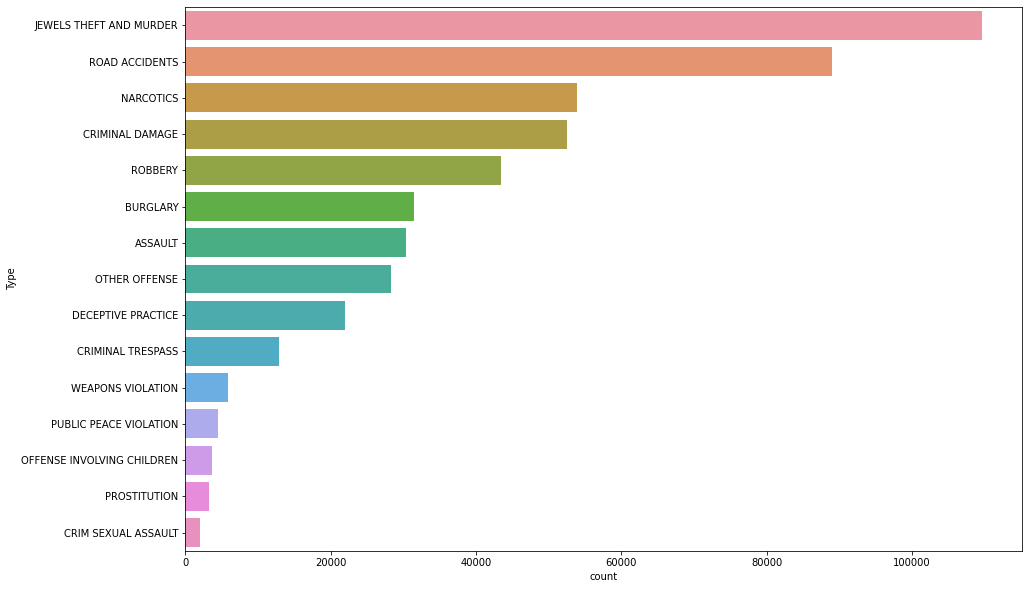

In [11]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Type', data = data, 
              order = data['Type'].value_counts().iloc[:15].index)

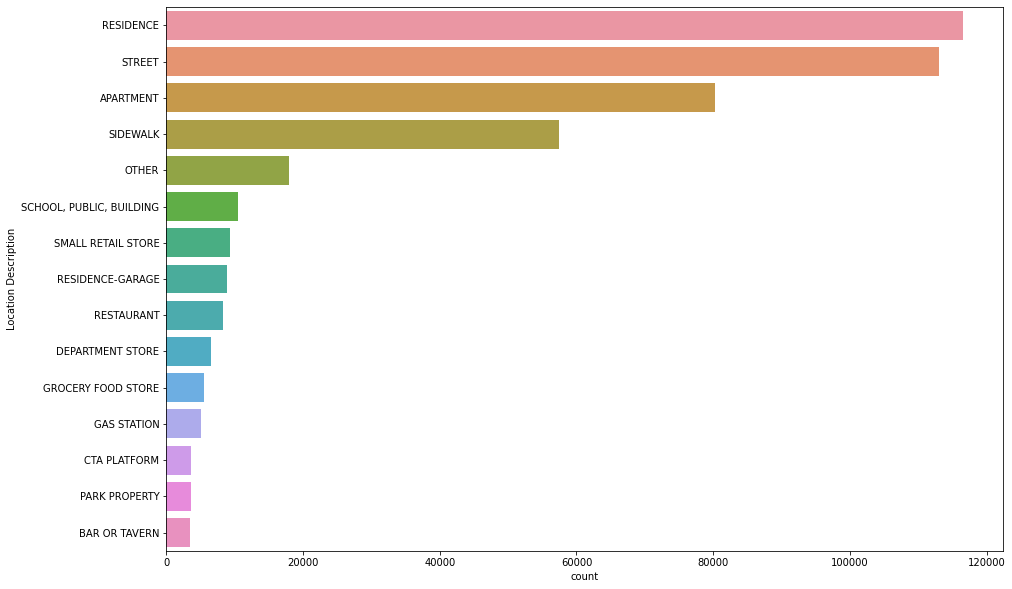

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = data, 
              order = data['Location Description'].value_counts().iloc[:15].index)


In [13]:
Groups = data.groupby(data['Type'])
Groups = dict(list(Groups))
theft_data = [Groups['JEWELS THEFT AND MURDER']]
theft_data = pd.concat(theft_data, axis = 0)
del Groups
del data
theft_data.head(5)


,ID,Date,Type,Location Description,Arrest
Date,,,,,
2017-05-03 22:00:00,10508699,2017-05-03 22:00:00,JEWELS THEFT AND MURDER,RESIDENCE,False
2017-05-03 17:30:00,10508717,2017-05-03 17:30:00,JEWELS THEFT AND MURDER,OTHER,False
2017-05-03 09:00:00,10508724,2017-05-03 09:00:00,JEWELS THEFT AND MURDER,STREET,False
2017-05-03 22:08:00,10508728,2017-05-03 22:08:00,JEWELS THEFT AND MURDER,STREET,False
2017-05-03 21:45:00,10508738,2017-05-03 21:45:00,JEWELS THEFT AND MURDER,STREET,False


In [14]:
theft_data.resample('Y').size()

Date
2014-12-31      881
2015-12-31     9646
2016-12-31     4991
2017-12-31       49
2018-12-31    74760
2019-12-31    19222
dtype: int64

Text(0, 0.5, 'Number of Jewels theft and murder Crimes')

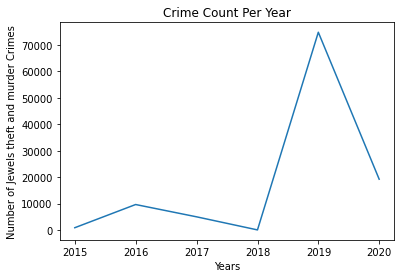

In [19]:
plt.plot(theft_data.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Jewels theft and murder Crimes')


In [20]:
theft_data.resample('M').size().head(), theft_data.resample('M').size().tail()


(Date
 2014-01-31    12
 2014-02-28    10
 2014-03-31    17
 2014-04-30    56
 2014-05-31    77
 dtype: int64, Date
 2019-08-31     20
 2019-09-30     27
 2019-10-31     52
 2019-11-30     69
 2019-12-31    121
 dtype: int64)

Text(0, 0.5, 'Number of Jewels theft and murder Crimes')

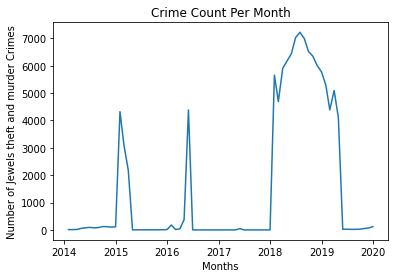

In [21]:
plt.plot(theft_data.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Jewels theft and murder Crimes')


In [0]:
theft_prophet = theft_data.resample('M').size().reset_index()

In [26]:
theft_prophet.columns = ['Date', 'Crime Count']
theft_prophet.head()


,Date,Crime Count
0,2014-01-31,12
1,2014-02-28,10
2,2014-03-31,17
3,2014-04-30,56
4,2014-05-31,77


In [27]:
theft_prophet.tail()

,Date,Crime Count
67,2019-08-31,20
68,2019-09-30,27
69,2019-10-31,52
70,2019-11-30,69
71,2019-12-31,121


In [0]:
theft_prophet_df = pd.DataFrame(theft_prophet)


In [29]:
theft_prophet_df.columns


Index(['Date', 'Crime Count'], dtype='object')

In [0]:
theft_prophet_data = theft_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [31]:
theft_prophet_data.head()

,ds,y
0,2014-01-31,12
1,2014-02-28,10
2,2014-03-31,17
3,2014-04-30,56
4,2014-05-31,77


In [32]:
theft_prophet_data.tail()

,ds,y
67,2019-08-31,20
68,2019-09-30,27
69,2019-10-31,52
70,2019-11-30,69
71,2019-12-31,121


In [34]:
theft_prophet_data.shape

(72, 2)

In [0]:
train = theft_prophet_data[:62]
test = theft_prophet_data[62:]


In [36]:
train.head()

,ds,y
0,2014-01-31,12
1,2014-02-28,10
2,2014-03-31,17
3,2014-04-30,56
4,2014-05-31,77


In [38]:
m = Prophet()
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=365)

In [0]:
forecast = m.predict(future)

In [41]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-31,-1672.059115,-2300.452521,2545.768165,-1672.059115,-1672.059115,1670.721251,1670.721251,1670.721251,1670.721251,1670.721251,1670.721251,0.0,0.0,0.0,-1.337863
1,2014-02-28,-1585.342589,-2944.881503,1615.084368,-1585.342589,-1585.342589,842.940657,842.940657,842.940657,842.940657,842.940657,842.940657,0.0,0.0,0.0,-742.401933
2,2014-03-31,-1489.335008,-2957.919697,2021.051352,-1489.335008,-1489.335008,1106.753947,1106.753947,1106.753947,1106.753947,1106.753947,1106.753947,0.0,0.0,0.0,-382.581060
3,2014-04-30,-1396.424445,-3314.337344,1498.751216,-1396.424445,-1396.424445,480.923387,480.923387,480.923387,480.923387,480.923387,480.923387,0.0,0.0,0.0,-915.501058
4,2014-05-31,-1300.416863,-2971.642965,1735.182084,-1300.416863,-1300.416863,782.804577,782.804577,782.804577,782.804577,782.804577,782.804577,0.0,0.0,0.0,-517.612286


In [42]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
422,2020-02-24,5190.086494,11837.553529,16458.622963,5190.024133,5190.149720,8987.119709,8987.119709,8987.119709,8987.119709,8987.119709,8987.119709,0.0,0.0,0.0,14177.206203
423,2020-02-25,5193.185515,9802.629188,14814.169533,5193.122913,5193.248641,7004.155629,7004.155629,7004.155629,7004.155629,7004.155629,7004.155629,0.0,0.0,0.0,12197.341144
424,2020-02-26,5196.284535,7814.226848,12675.098929,5196.221693,5196.347562,5081.094347,5081.094347,5081.094347,5081.094347,5081.094347,5081.094347,0.0,0.0,0.0,10277.378883
425,2020-02-27,5199.383556,6012.967445,10749.362146,5199.320473,5199.446806,3265.938889,3265.938889,3265.938889,3265.938889,3265.938889,3265.938889,0.0,0.0,0.0,8465.322445
426,2020-02-28,5202.482577,4474.605910,9122.590698,5202.419254,5202.546349,1603.729571,1603.729571,1603.729571,1603.729571,1603.729571,1603.729571,0.0,0.0,0.0,6806.212148


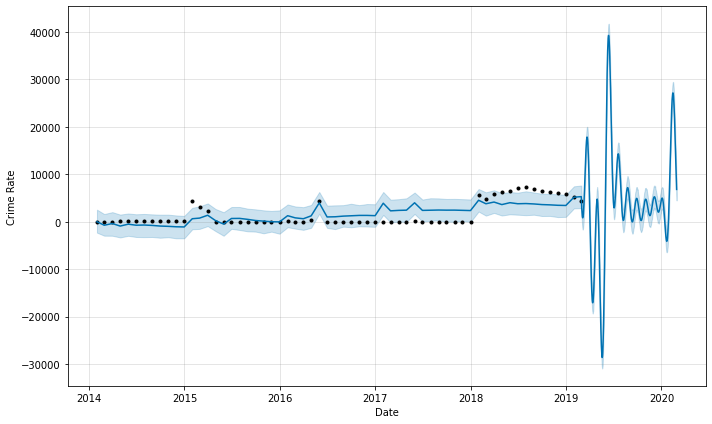

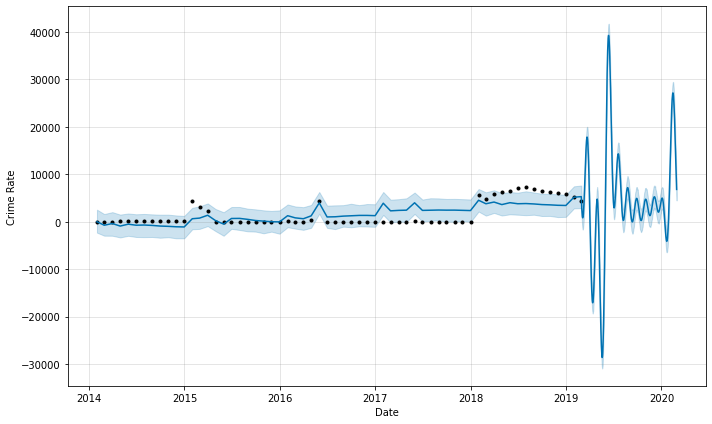

In [43]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

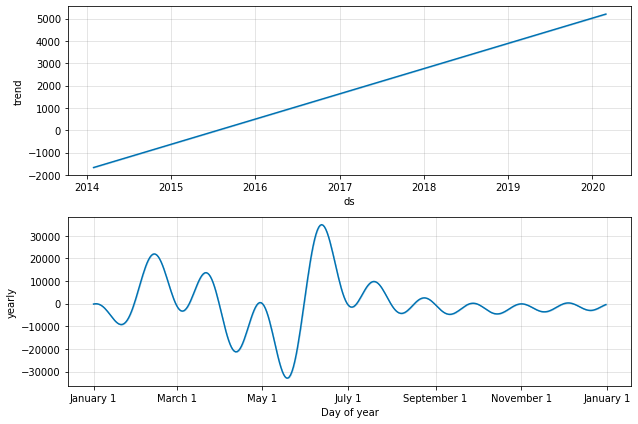

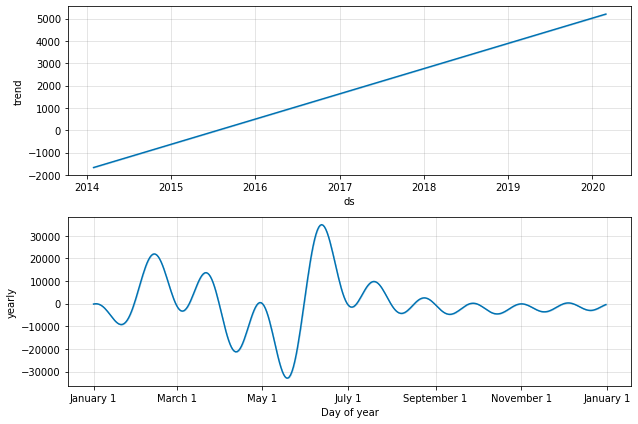

In [44]:
m.plot_components(forecast)

In [45]:
test

,ds,y
62,2019-03-31,5096
63,2019-04-30,4091
64,2019-05-31,21
65,2019-06-30,26
66,2019-07-31,21
67,2019-08-31,20
68,2019-09-30,27
69,2019-10-31,52
70,2019-11-30,69
71,2019-12-31,121


In [46]:
test.head()

,ds,y
62,2019-03-31,5096
63,2019-04-30,4091
64,2019-05-31,21
65,2019-06-30,26
66,2019-07-31,21


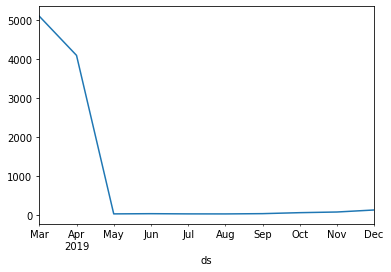

In [48]:
test = test.set_index("ds")
test = test['y']
import matplotlib.pyplot as plt
test.plot()


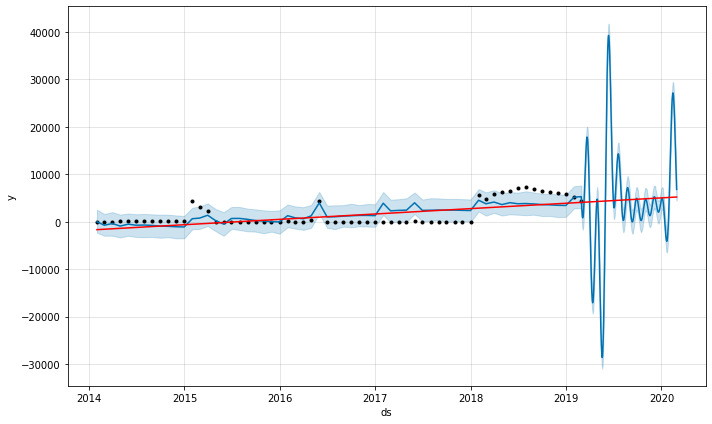

In [51]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
c = add_changepoints_to_plot(fig.gca(),m,forecast)
